<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
dt=data.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'})
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dt.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
dt.max()

delivery_time    29.0
sorting_time     10.0
dtype: float64

In [9]:
dt.min()

delivery_time    8.0
sorting_time     2.0
dtype: float64

In [10]:
dt.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
dt.tail()

,delivery_time,sorting_time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [80]:
dt.shape

(21, 3)

In [12]:
# checking for null values

<Axes: >

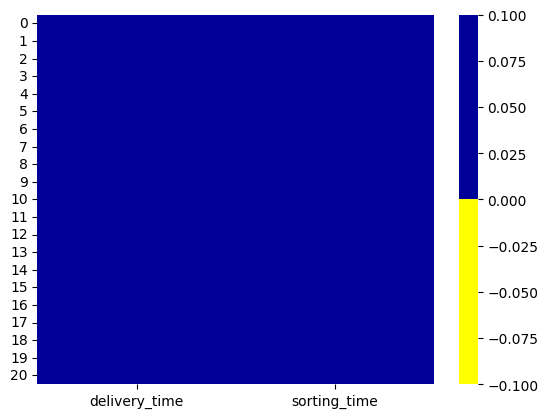

In [13]:
cols=dt.columns
color=['#ffff00','#000099']
sns.heatmap(dt[cols].isnull(),cmap=sns.color_palette(color))

In [14]:
dt[dt.duplicated()].shape

(0, 2)

<ipython-input-16-5aa30c8ae8e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

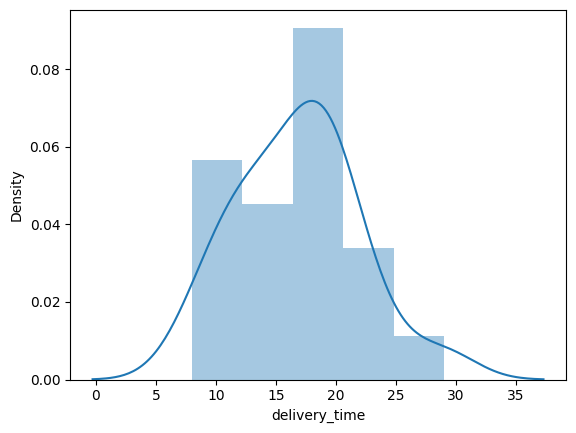

In [16]:
sns.distplot(dt['delivery_time'])

<ipython-input-17-e548ed0b67f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

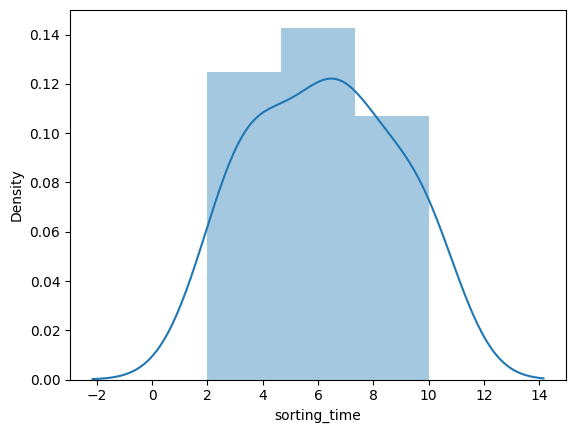

In [17]:
sns.distplot(dt['sorting_time'])

<Axes: xlabel='delivery_time', ylabel='Count'>

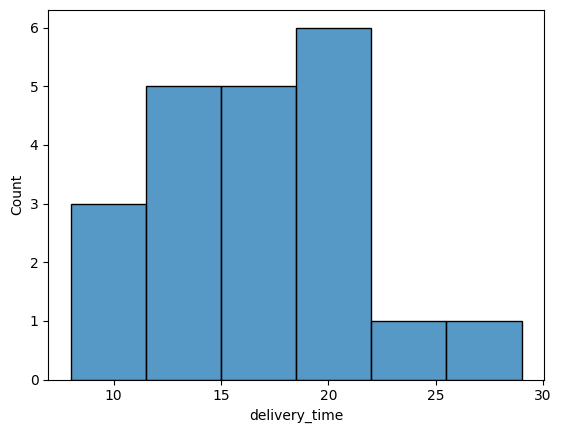

In [18]:
sns.histplot(dt['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='Count'>

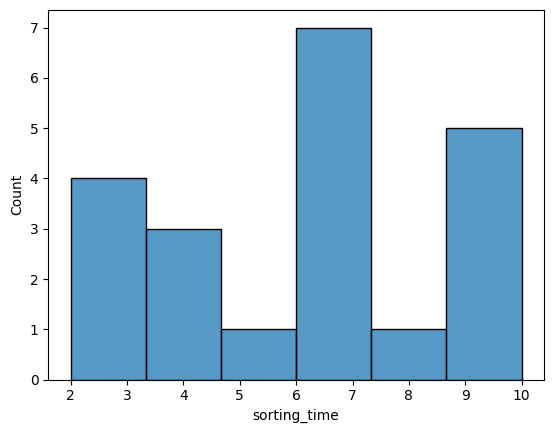

In [19]:
sns.histplot(dt['sorting_time'])

<Axes: >

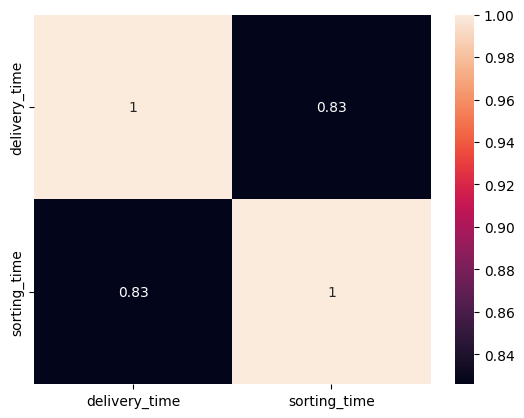

In [15]:
sns.heatmap(dt.corr(),annot=True)

<Axes: xlabel='delivery_time', ylabel='sorting_time'>

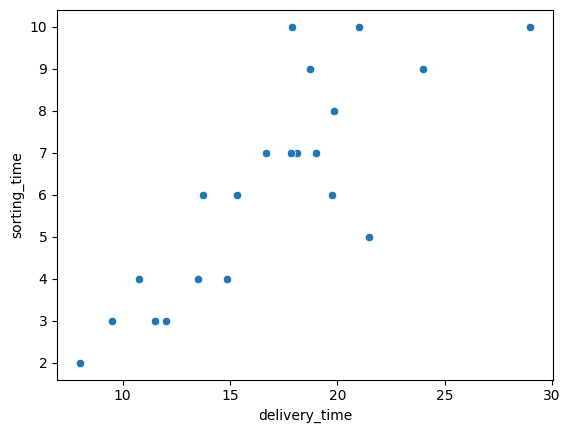

In [20]:
sns.scatterplot(x=dt['delivery_time'],y=dt['sorting_time'],data=dt)

In [21]:
# from the above data , we can understand that the variables are positively linear associated
# as the delivery time increases , the time take to sort the food also increases
# therefore , x(independent variable)= sorting time , y(target variable)=delivery time

In [24]:
# regression plot = helps us to understand the line of best fit

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

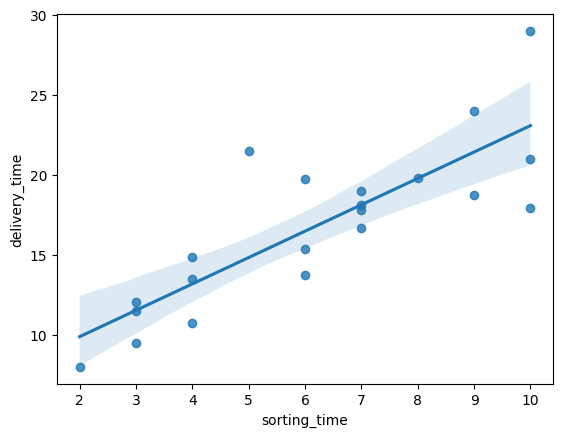

In [23]:
sns.regplot(x=dt['sorting_time'],y=dt['delivery_time'],data=dt)

In [25]:
# building the model

In [26]:
model=smf.ols('delivery_time~sorting_time',data=dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        10:47:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# from the above model summery , we can conclude saying that that
# the model is not accurate (67%)


In [29]:
pred=model.predict(dt)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [30]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [33]:
rmse_lin=np.sqrt(np.array(np.mean(dt['delivery_time']-np.array(pred))**2))
rmse_lin

6.259543148362787e-15

In [34]:
# plottingb the linear model

Text(0, 0.5, 'delivery_time')

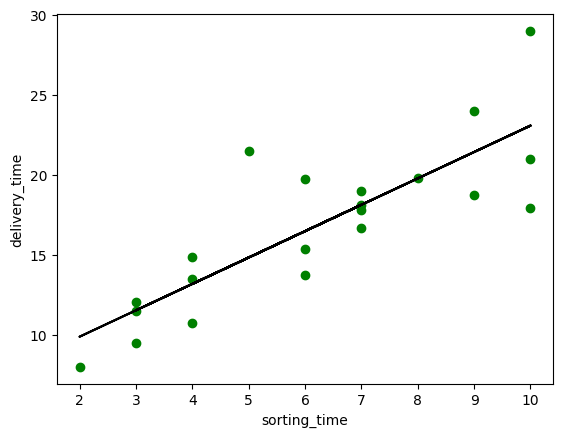

In [35]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='green')
plt.plot(dt['sorting_time'],pred,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [39]:
model2=smf.ols('delivery_time~np.log(sorting_time)',data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        11:08:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pred2=model2.predict(dt)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [42]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [44]:
rmse_log=np.sqrt(np.array(np.mean(dt['delivery_time']-np.array(pred2))**2))
rmse_log

8.881784197001252e-15

Text(0, 0.5, 'delivery_time')

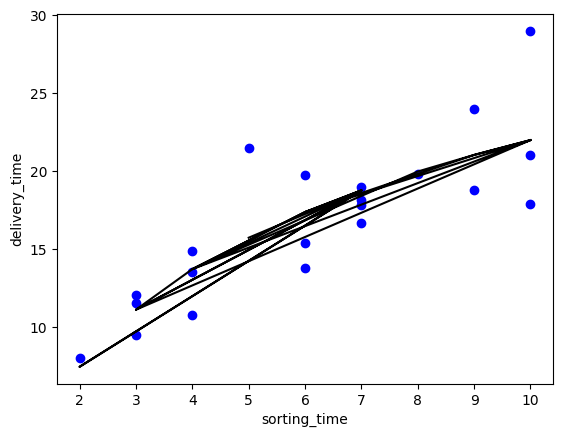

In [45]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='blue')
plt.plot(dt['sorting_time'],pred2,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [47]:
model3=smf.ols('np.log(delivery_time)~sorting_time',data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 02 Dec 2023   Prob (F-statistic):           1.59e-06
Time:                           11:15:03   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pred_ex=model3.predict(dt)
pred_ex

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [57]:
pred3=np.exp(pred_ex)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [58]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [60]:
rmse_expo=np.sqrt(np.array(np.mean(dt['delivery_time']-np.array(pred3))**2))
rmse_expo

0.1981093847379055

Text(0, 0.5, 'delivery_time')

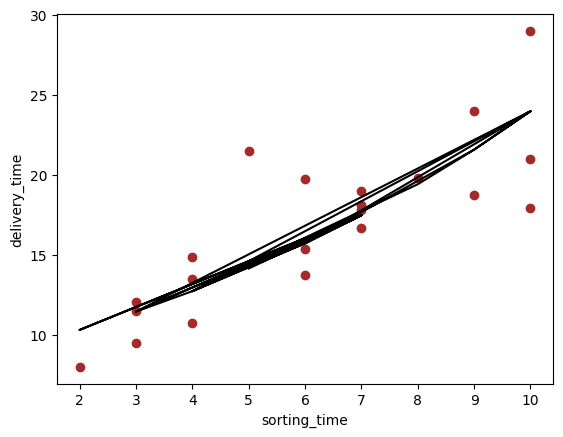

In [61]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='brown')
plt.plot(dt['sorting_time'],pred3,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [62]:
dt['sort_sqr']=dt.sorting_time*dt.sorting_time

In [66]:
model4=smf.ols('np.log(delivery_time)~sorting_time+sort_sqr',data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 02 Dec 2023   Prob (F-statistic):           2.20e-06
Time:                           12:05:05   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time     0.2659      0.080      3.315      0.004       0.097       0.434
sort_sqr        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
pred_quad=model4.predict(dt)
pred_quad

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [71]:
pred4=np.exp(pred_quad)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [73]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

Text(0, 0.5, 'delivery_time')

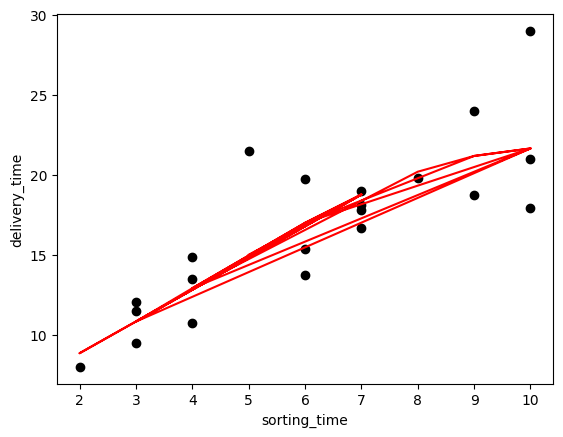

In [74]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='black')
plt.plot(dt['sorting_time'],pred4,color='red')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [76]:
rmse_quad=np.sqrt(np.array(np.mean(dt['delivery_time']-np.array(pred4))**2))
rmse_quad

0.1915094904676828

In [77]:
data={'MODEL':pd.Series(['rmse_lin','rmse_log','rmse_exp','rmse_quad']),
     'RMSE_VALUES':pd.Series([rmse_lin,rmse_log,rmse_expo,rmse_quad]),
     'rsquare':pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_VALUES,rsquare
0,rmse_lin,6.259543e-15,0.682271
1,rmse_log,8.881784e-15,0.695443
2,rmse_exp,1.981094e-01,0.710948
3,rmse_quad,1.915095e-01,0.764867


In [78]:
model4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

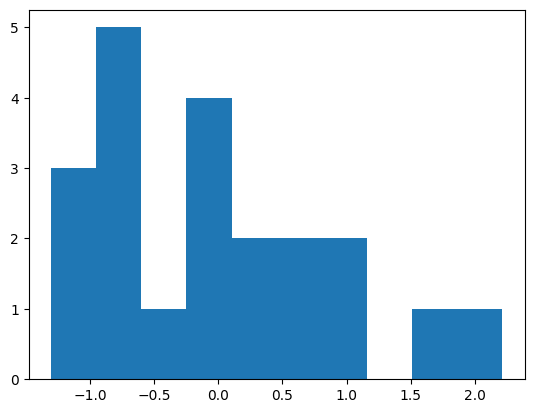

In [79]:
plt.hist(model4.resid_pearson)

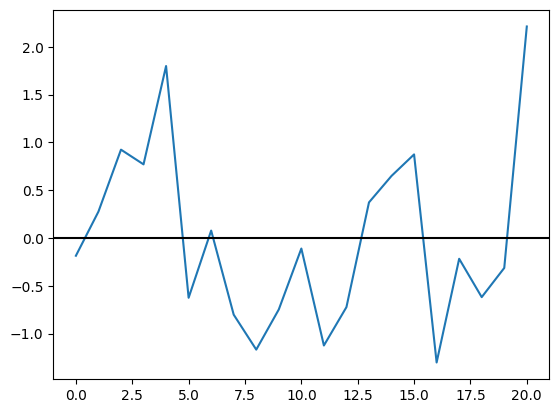

In [83]:
plt.plot(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='black')

In [84]:
# the mean of the model is 0
# hence , the model compressed with quadratic transformation is the best model